# Linear Regression Model on Cars data

In [1]:
#### Loading the require libraries, models......
import numpy as np   
import pandas as pd    
import seaborn as sns

In [2]:
### Loading the Dataset...
df = pd.read_csv('car_updated.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007.0,60000,70000.0,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007.0,135000,50000.0,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012.0,600000,100000.0,NaN,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017.0,250000,46000.0,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014.0,450000,141000.0,Diesel,Individual,Manual,Second Owner


In [3]:
### Getting the dimensions of the dataset (no of rows n columns)
df.shape

(4340, 8)

In [4]:
### listing the columns (variables)
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [5]:
df.dtypes

name              object
year             float64
selling_price      int64
km_driven        float64
fuel              object
seller_type       object
transmission      object
owner             object
dtype: object

In [6]:
#### getting more info on the variables....
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           4340 non-null   object 
 1   year           4338 non-null   float64
 2   selling_price  4340 non-null   int64  
 3   km_driven      4336 non-null   float64
 4   fuel           4337 non-null   object 
 5   seller_type    4340 non-null   object 
 6   transmission   4338 non-null   object 
 7   owner          4340 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 271.4+ KB


In [7]:
#### Getting a statistical summary of the dataset...
df.describe()

,year,selling_price,km_driven
count,4338.000000,4.340000e+03,4336.000000
mean,2013.090364,5.041273e+05,66214.362085
std,4.216271,5.785487e+05,46654.764844
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [8]:
#### Checking for Duplicates and dropping if any ...
df.duplicated().sum()

754

In [9]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [10]:
### checking for null values....
df.isnull().sum()
Null = df.isnull().sum()
print(Null[Null>0])

year            2
km_driven       4
fuel            3
transmission    2
dtype: int64


In [ ]:
### Need to handle Null values...
## Fuel,transmission = categorical => mode  (object dtype)
#     year,km_driven = continous  => median (Float 64 dtype)

# Lets separate the Categorical and Continuous variables

In [11]:
### Extracting Continous(numeric) Variables....
continous = df.describe().columns
continous

Index(['year', 'selling_price', 'km_driven'], dtype='object')

In [12]:
df[continous]

,year,selling_price,km_driven
0,2007.0,60000,70000.0
1,2007.0,135000,50000.0
2,2012.0,600000,100000.0
3,2017.0,250000,46000.0
4,2014.0,450000,141000.0
...,...,...,...
4335,2014.0,409999,80000.0
4336,2014.0,409999,80000.0
4337,2009.0,110000,83000.0
4338,2016.0,865000,90000.0


In [13]:
#### extracting Categorical variables
categorical  = df.columns.drop(continous)
categorical

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [14]:
df[categorical]

,name,fuel,seller_type,transmission,owner
0,Maruti 800 AC,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,NaN,Individual,Manual,First Owner
3,Datsun RediGO T Option,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,Diesel,Individual,Manual,First Owner


In [15]:
### Replacing Nulls with Mode (categorical var) and Median(continous var) ...

for i in df:
    if df[i].dtype == object:
        df[i].fillna(df[i].mode()[0],inplace = True)
    else:
        df[i].fillna(df[i].median(),inplace = True)
df.isnull().sum()               

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

<AxesSubplot:>

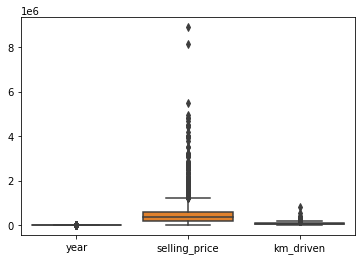

In [16]:
### Checking for Outliers "age".... 
## Box plot:
sns.boxplot(data= df[continous])

In [17]:
### Outlier treatment ....

for i in df[continous]:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3 -q1
    upper = q3 + (1.5 * IQR)
    lower = q1 - (1.5 * IQR)
    df[i] = np.where(df[i] > upper , upper, df[i])
    df[i] = np.where(df[i] < lower , lower, df[i])


<AxesSubplot:>

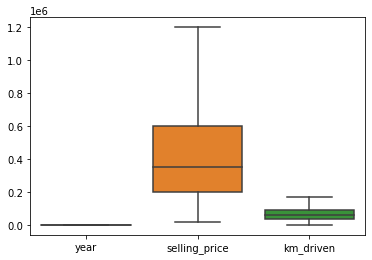

In [18]:
### Crosschecking for Outliers .... 
## Box plot
sns.boxplot(data= df[continous])

In [19]:
#### Extracting the target variable....
target = df['selling_price']
target.value_counts()

1200000.0    186
300000.0     137
250000.0     115
350000.0     106
500000.0      87
            ... 
1035000.0      1
213000.0       1
587000.0       1
351000.0       1
149000.0       1
Name: selling_price, Length: 363, dtype: int64

In [20]:
### dropping the targety variable from the dataset ...
df.drop('selling_price', axis = 1 , inplace = True)
df.columns

Index(['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner'],
      dtype='object')

In [21]:
### Encoding the Categorical variables using LabelEncoder()..
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

df.name = encode.fit_transform(df.name)
df.fuel = encode.fit_transform(df.fuel)
df.seller_type = encode.fit_transform(df.seller_type)
df.transmission = encode.fit_transform(df.transmission)
df.owner = encode.fit_transform(df.owner)

In [22]:
#### converting the categorical columns to Categorical dtype.... 
df.name = pd.Categorical(df.name)
df.fuel = pd.Categorical(df.fuel)
df.seller_type = pd.Categorical(df.seller_type)
df.transmission = pd.Categorical(df.transmission)
df.owner = pd.Categorical(df.owner)
df[categorical]

,name,fuel,seller_type,transmission,owner
0,775,4,1,1,0
1,1041,4,1,1,0
2,505,1,1,1,0
3,118,4,1,1,0
4,279,1,1,1,2
...,...,...,...,...,...
4335,602,1,1,1,2
4336,601,1,1,1,2
4337,777,4,1,1,2
4338,381,1,1,1,0


In [23]:
### creating x(predictor), y(target) variables.. 
x = df.values
y = target.values

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [25]:
### Splitting the data into train and test sets
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state = 1)

In [26]:
##  Creating an instance of LINEAR REGRESSION 
lin = LinearRegression()

In [27]:
### fitting the data into the model
lin.fit(xtrain,ytrain)

LinearRegression()

In [28]:
#### prediction :
ypred = lin.predict(xtest)
ypred[0:10]

array([ 588609.78052546,  537681.73144171,  312392.63100481,
        508224.3598243 ,  481201.65702894,  590721.34447685,
        146854.52809697, 1028877.50406337,  217184.93651891,
        107842.99467154])

In [30]:
print('The coefficients for linear model are:',lin.coef_)
print('The "y" intercept Bo is:',lin.intercept_)

The coefficients for linear model are: [-2.94011885e+00  3.38553813e+04 -7.62140092e-01 -6.47688089e+04
 -2.81116600e+04 -3.39428996e+05 -5.96484802e+03]
The "y" intercept Bo is: -67169533.18681051


In [35]:
from sklearn.metrics import r2_score
r2 = r2_score(ytest,ypred)
print('The r2 score for the Linear model which predicts mean value always is', r2)

The r2 score for the Linear model which predicts mean value always is 0.5667959300480006


In [ ]:
# from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(ypred,ytest)) 
print('The Root Mean Square Error is:',rmse)

# Alternate method 

In [36]:
#### Loading the require libraries, models......
import numpy as np   
import pandas as pd    
import seaborn as sns

In [37]:
### Loading the Dataset...
df = pd.read_csv('car_updated.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007.0,60000,70000.0,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007.0,135000,50000.0,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012.0,600000,100000.0,NaN,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017.0,250000,46000.0,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014.0,450000,141000.0,Diesel,Individual,Manual,Second Owner


In [38]:
#### Checking for Duplicates and dropping if any ...
df.duplicated().sum()

754

In [39]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [40]:
### checking for null values....
df.isnull().sum()
Null = df.isnull().sum()
print(Null[Null>0])

year            2
km_driven       4
fuel            3
transmission    2
dtype: int64


In [ ]:
### Need to handle Null values...
## Fuel,transmission = categorical => mode  (object dtype)
#     year,km_driven = continous  => median (Float 64 dtype)

# Lets separate the Categorical and Continuous variables

In [41]:
### Extracting Continous(numeric) Variables....
continous = df.describe().columns
continous

Index(['year', 'selling_price', 'km_driven'], dtype='object')

In [42]:
df[continous]

,year,selling_price,km_driven
0,2007.0,60000,70000.0
1,2007.0,135000,50000.0
2,2012.0,600000,100000.0
3,2017.0,250000,46000.0
4,2014.0,450000,141000.0
...,...,...,...
4335,2014.0,409999,80000.0
4336,2014.0,409999,80000.0
4337,2009.0,110000,83000.0
4338,2016.0,865000,90000.0


In [43]:
#### extracting Categorical variables
categorical  = df.columns.drop(continous)
categorical

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [44]:
df[categorical]

,name,fuel,seller_type,transmission,owner
0,Maruti 800 AC,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,NaN,Individual,Manual,First Owner
3,Datsun RediGO T Option,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,Diesel,Individual,Manual,First Owner


In [45]:
### Replacing Nulls with Mode (categorical var) and Median(continous var) ...

for i in df:
    if df[i].dtype == object:
        df[i].fillna(df[i].mode()[0],inplace = True)
    else:
        df[i].fillna(df[i].median(),inplace = True)
df.isnull().sum()     

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [46]:
### Outlier treatment ....

for i in df[continous]:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3 -q1
    upper = q3 + (1.5 * IQR)
    lower = q1 - (1.5 * IQR)
    df[i] = np.where(df[i] > upper , upper, df[i])
    df[i] = np.where(df[i] < lower , lower, df[i])

## since the box plots were alresdy plotted skipping it now

In [47]:
### Encoding the Categorical variables using LabelEncoder()..
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

df.name = encode.fit_transform(df.name)
df.fuel = encode.fit_transform(df.fuel)
df.seller_type = encode.fit_transform(df.seller_type)
df.transmission = encode.fit_transform(df.transmission)
df.owner = encode.fit_transform(df.owner)

In [48]:
#### converting the categorical columns to Categorical dtype.... 
df.name = pd.Categorical(df.name)
df.fuel = pd.Categorical(df.fuel)
df.seller_type = pd.Categorical(df.seller_type)
df.transmission = pd.Categorical(df.transmission)
df.owner = pd.Categorical(df.owner)
df[categorical]

,name,fuel,seller_type,transmission,owner
0,775,4,1,1,0
1,1041,4,1,1,0
2,505,1,1,1,0
3,118,4,1,1,0
4,279,1,1,1,2
...,...,...,...,...,...
4335,602,1,1,1,2
4336,601,1,1,1,2
4337,777,4,1,1,2
4338,381,1,1,1,0


In [49]:
### Importing statsmodels.Formula.api...
import statsmodels.formula.api as smf 

In [50]:
#### Fitting the dataset on the model...

LinearModel = smf.ols(formula='selling_price ~ name + year + km_driven + fuel + seller_type + transmission + owner',
                      data =df ).fit()

In [51]:
print(LinearModel.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     29.82
Date:                Sun, 26 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:09:36   Log-Likelihood:                -44747.
No. Observations:                3586   AIC:                         9.250e+04
Df Residuals:                    2084   BIC:                         1.018e+05
Df Model:                        1501                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5.102e+07   2.18e+0